## Trabajo Practico Fundamentos de ciencias de datos

### Librerias

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets, model_selection, metrics, preprocessing, linear_model
from matplotlib import dates


### Importar el csv

#### Dataset elegido

Son datos históricos de acciones de bancos internacionales que obtengas desde yfinance. Este dataset incluirá variables numéricas relacionadas con precios y volumen de las acciones, además de información categórica (como el sector financiero), fechas (variable temporal), y variables geográficas (por ejemplo, la ubicación de la sede principal del banco o su país de operaciones).

#### Tickers seleccionados

- HSBC - HSBC Holdings plc (Reino Unido)

- BBVA - Banco Bilbao Vizcaya Argentaria, S.A. (España)

- SAN - Banco Santander, S.A. (España)

- BNS - Bank of Nova Scotia (Canadá)

- TD - Toronto-Dominion Bank (Canadá)

- DB - Deutsche Bank AG (Alemania)

- UBS - UBS Group AG (Suiza)

- ITUB - Itaú Unibanco Holding S.A. (Brasil)

- BBAS3.SA - Banco do Brasil S.A. (Brasil)

- WBC.AX - Westpac Banking Corporation (Australia)

- ANZ.AX - Australia and New Zealand Banking Group Limited (Australia)

- ICICIBANK.NS - ICICI Bank Limited (India)

- HDFCBANK.NS - HDFC Bank Limited (India)

- KB - KB Financial Group Inc. (Corea del Sur)

- SMFG - Sumitomo Mitsui Financial Group, Inc. (Japón)

- GGAL - Grupo Financiero Galicia S.A. (Argentina)

#### Origen

Datos extraídos de la API de yfinance, que proporciona datos históricos del mercado de valores.

Tipo de datos:

Numéricos: Precios de apertura, cierre, máximos y mínimos diarios, volumen de transacciones.

Categóricos: Nombre de la acción, sector del banco.

Temporales: Fechas de cada registro.

Geográficos: País de operación de cada banco (varía según la ubicación de cada banco).

Diccionario de Variables:

Date: Fecha del registro (temporal).

Ticker: Identificador del banco (categórico).

Open: Precio de apertura de la acción (numérico).

High: Precio más alto alcanzado en el día (numérico).

Low: Precio más bajo alcanzado en el día (numérico).

Close: Precio de cierre de la acción (numérico).

Volume: Volumen de transacciones de la acción (numérico).

Market Cap: Capitalización de mercado del banco (numérico).

Sector: Categoría que identifica el sector financiero al que pertenece el banco (categórico).

City: Ciudad donde se encuentra la sede principal del banco (geográfico).

Country: País de operación del banco (geográfico).


In [36]:
df=pd.read_csv('bank_tickers_data.csv')

### Limpieza de datos

#### Manipulación y Transformación del Dataset

Manejo de datos faltantes: Puede haber días sin transacciones, por lo que hay que  los manejar datos faltantes. Podemos optar por eliminar esos días o rellenarlos (por ejemplo, con el valor anterior, ya que por lo general si no hay transacciones puede ser por un feriado o dia que no abra el mercado).

Datos duplicados: Revisamos si hay filas duplicadas y las eliminamos, ya que es poco probable que se repitan todos los campos

Variables geográficas: La columna "Country" ya incluye la ubicación geográfica del banco, permitiendo análisis comparativos por región.

#### Valores nan y duplicados por banco

In [37]:
for ticker in df['Ticker'].unique():
    bank_data = df[df['Ticker'] == ticker]
    nan_summary = bank_data.isna().sum()

    print(f"Valores NaN en {ticker}:\n{nan_summary}\n")

for ticker in df['Ticker'].unique():
    bank_data = df[df['Ticker'] == ticker]
    duplicates_count = bank_data.duplicated().sum()

    print(f"Valores duplicados en {ticker}: {duplicates_count}\n")


Valores NaN en HSBC:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector        0
City          0
Country       0
dtype: int64

Valores NaN en BBVA:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector        0
City          0
Country       0
dtype: int64

Valores NaN en SAN:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector        0
City          0
Country       0
dtype: int64

Valores NaN en BNS:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector        0
City          0
Country       0
dtype: int64

Valores NaN en TD:
Date          0
Ticker        0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Sector     

#### Verificacion de valores unicos en sector, ciudad y pais

In [38]:
for ticker in df['Ticker'].unique():
    bank_data = df[df['Ticker'] == ticker]

    sector_unique = bank_data['Sector'].unique()
    city_unique = bank_data['City'].unique()
    country_unique = bank_data['Country'].unique()

    print(f"{ticker} - Sector: {sector_unique}")
    print(f"{ticker} - City: {city_unique}")
    print(f"{ticker} - Country: {country_unique}\n")

HSBC - Sector: ['Financial Services']
HSBC - City: ['London']
HSBC - Country: ['United Kingdom']

BBVA - Sector: ['Financial Services']
BBVA - City: ['Bilbao']
BBVA - Country: ['Spain']

SAN - Sector: ['Financial Services']
SAN - City: ['Madrid']
SAN - Country: ['Spain']

BNS - Sector: ['Financial Services']
BNS - City: ['Toronto']
BNS - Country: ['Canada']

TD - Sector: ['Financial Services']
TD - City: ['Toronto']
TD - Country: ['Canada']

DB - Sector: ['Financial Services']
DB - City: ['Frankfurt am Main']
DB - Country: ['Germany']

UBS - Sector: ['Financial Services']
UBS - City: ['Zurich']
UBS - Country: ['Switzerland']

ITUB - Sector: ['Financial Services']
ITUB - City: ['São Paulo']
ITUB - Country: ['Brazil']

BBAS3.SA - Sector: ['Financial Services']
BBAS3.SA - City: ['Brasília']
BBAS3.SA - Country: ['Brazil']

WBC.AX - Sector: ['Financial Services']
WBC.AX - City: ['Sydney']
WBC.AX - Country: ['Australia']

ANZ.AX - Sector: ['Financial Services']
ANZ.AX - City: ['Melbourne']
A

#### Truncado de los vaores ya que tienen muchos decimales

In [39]:
df = df.round(2)

#### Formatemamos el market cap y el volumen asi tenemos una vista mas clara de los numeros

### Estudio mensual del volumen

#### Volumen mensual con respecto al cierre de promedio mensual

/var/folders/4c/ty5g0m6s3j5902s87t7fh3y80000gn/T/ipykernel_43572/356313630.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume_df = df_volume_mean.groupby([pd.Grouper(freq='M'), 'Ticker']).agg({
/var/folders/4c/ty5g0m6s3j5902s87t7fh3y80000gn/T/ipykernel_43572/356313630.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data.sort_values('Date', inplace=True)
/var/folders/4c/ty5g0m6s3j5902s87t7fh3y80000gn/T/ipykernel_43572/356313630.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data.sort_values('Date', inplace=True)
/var/folders/4c/

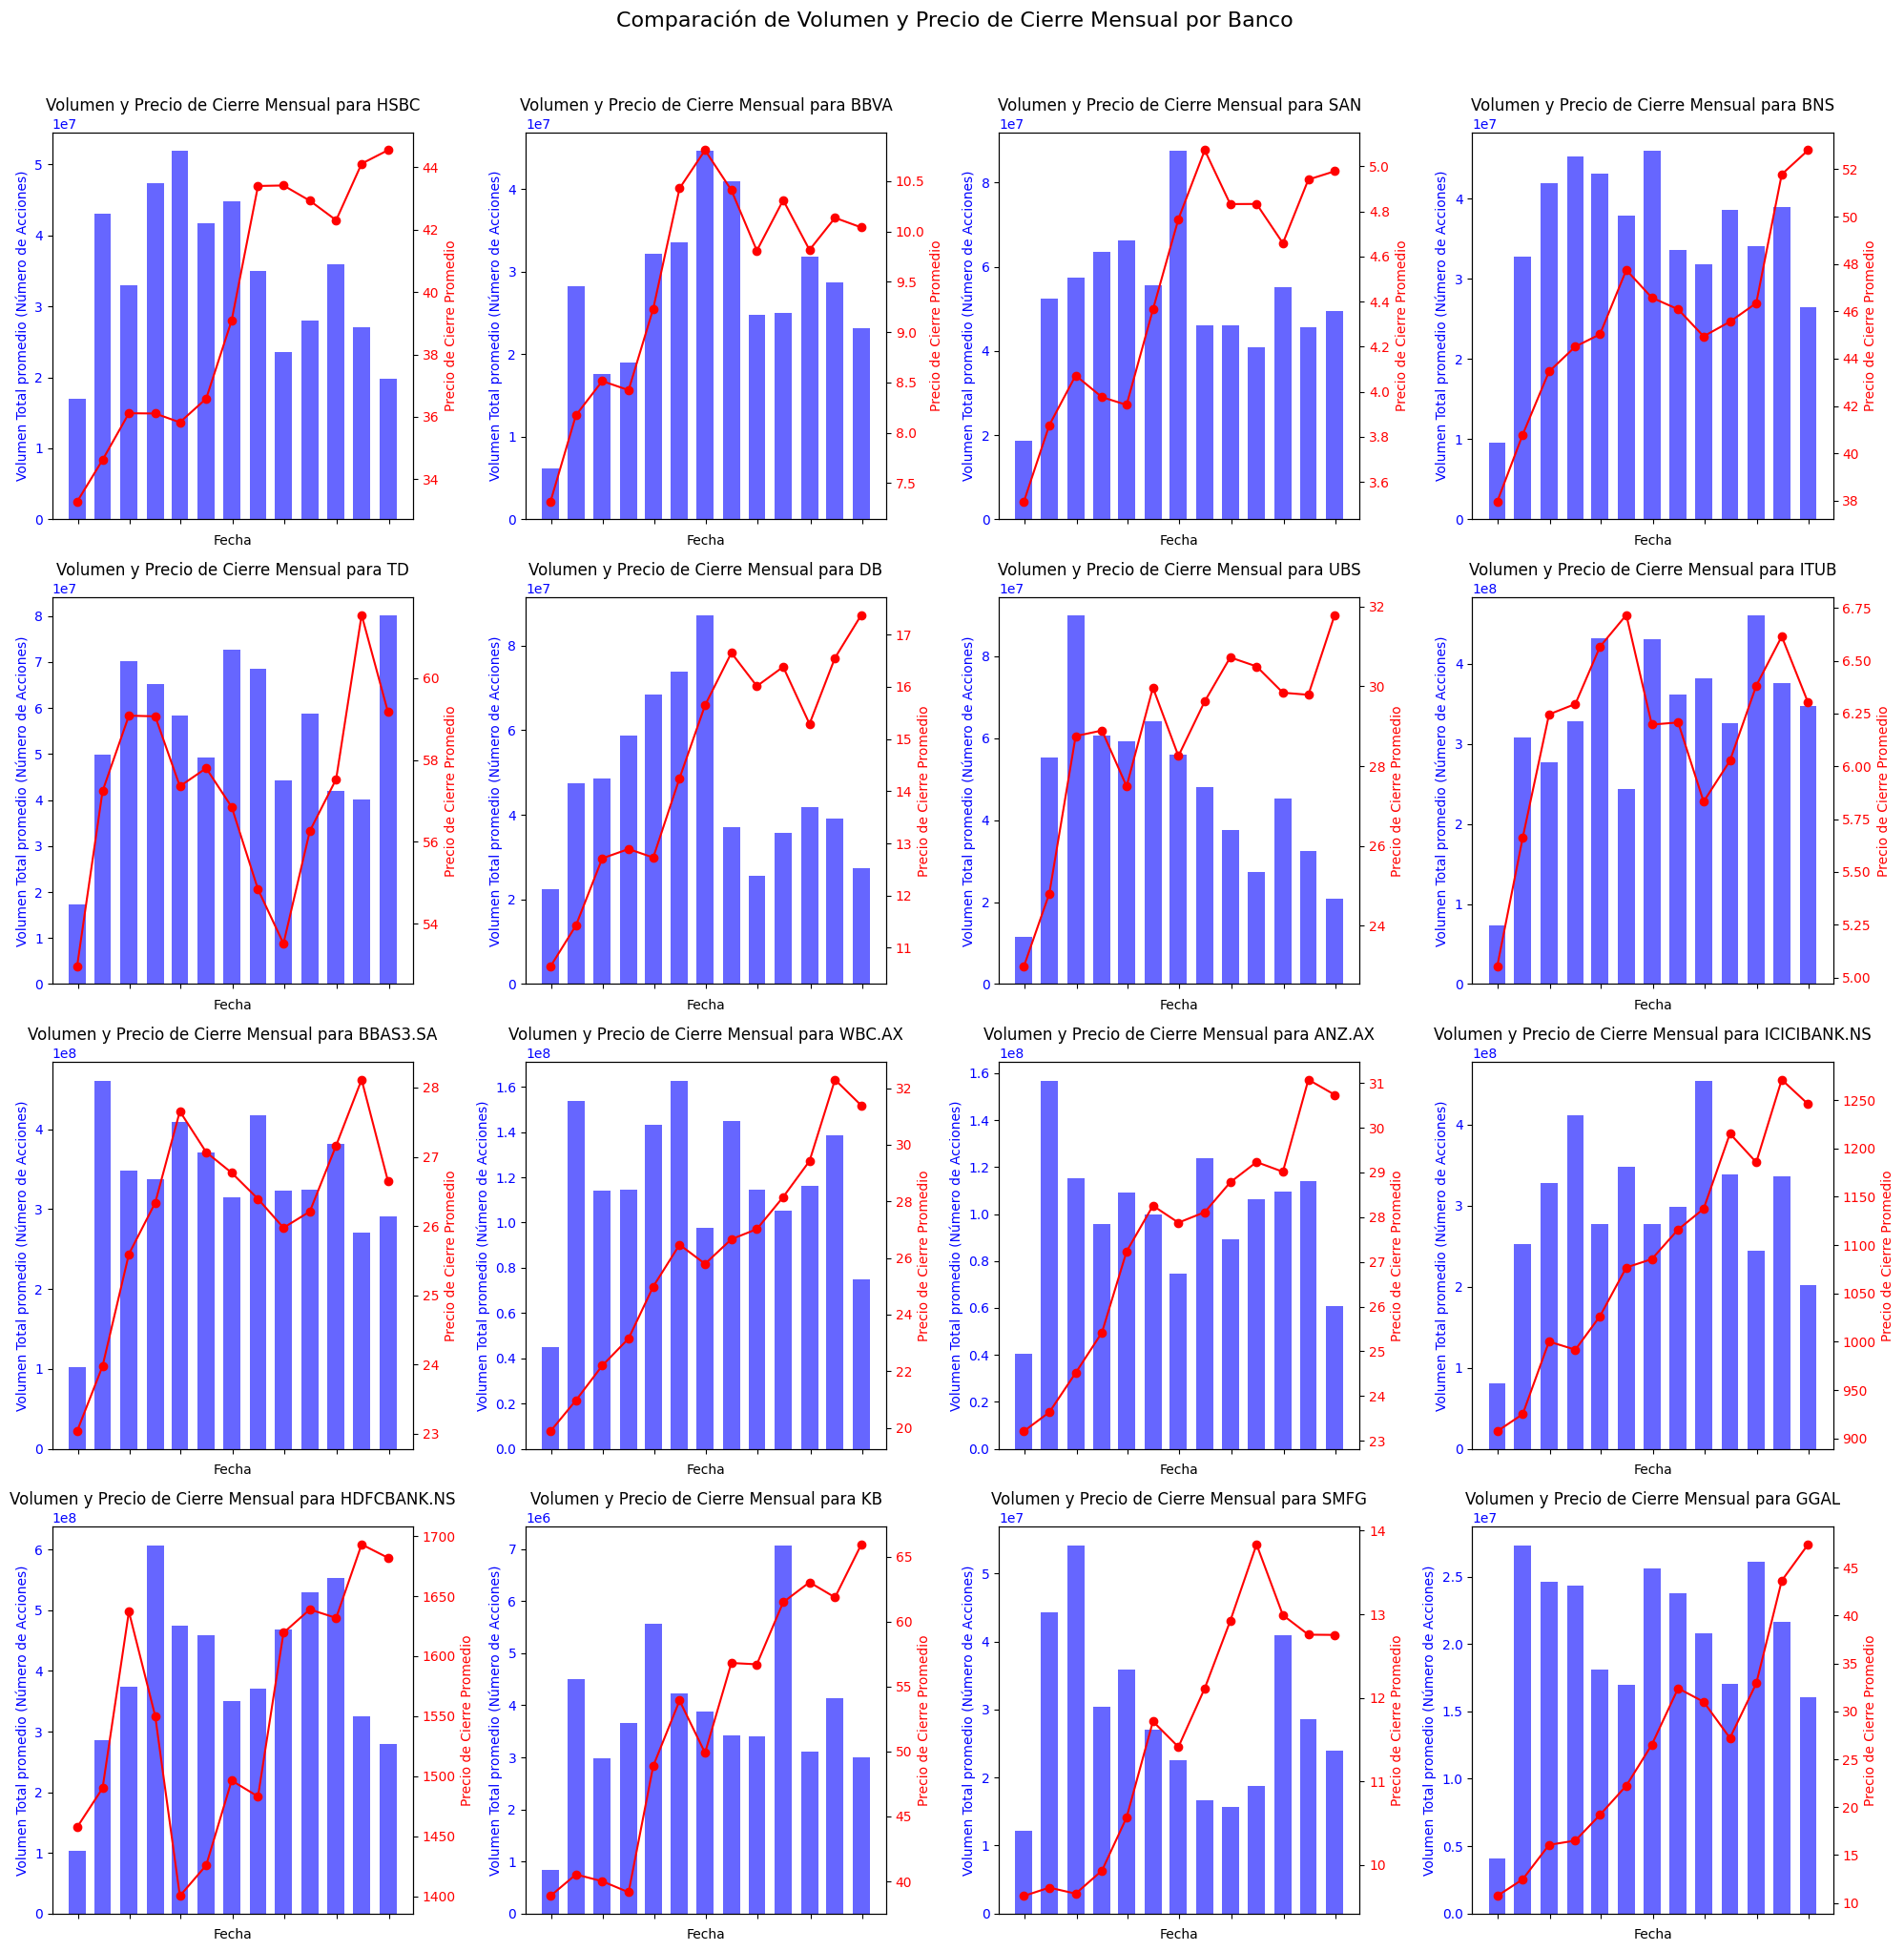

In [40]:
# Crear una copia del DataFrame original para trabajar con el volumen
df_volume_mean = df.copy()

# Convertir la columna 'Date' a datetime y ajustar a UTC
df_volume_mean['Date'] = pd.to_datetime(df_volume_mean['Date'], utc=True)
df_volume_mean['Date'] = df_volume_mean['Date'].dt.tz_localize(None)

# Establecer 'Date' como el índice del DataFrame
df_volume_mean.set_index('Date', inplace=True)

# Agrupar por mes y ticker para calcular el volumen total y el precio de cierre promedio mensual
monthly_volume_df = df_volume_mean.groupby([pd.Grouper(freq='M'), 'Ticker']).agg({
    'Volume': 'sum',
    'Close': 'mean'
}).reset_index()

# Definir el número de tickers
tickers = df_volume_mean['Ticker'].unique()
num_tickers = len(tickers)

# Definir el número de columnas y filas para los subplots
ncols = 4
nrows = (num_tickers + ncols - 1) // ncols  # Calcula el número de filas necesarias

# Crear subplots para todos los tickers en una sola figura
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows), constrained_layout=True)

# Aplanar el array de ejes para facilitar la iteración
axs = axs.flatten()

# Graficar el volumen y el precio de cierre mensual por cada ticker
for i, ticker in enumerate(tickers):
    bank_data = monthly_volume_df[monthly_volume_df['Ticker'] == ticker]
    ax = axs[i]
    
    # Ordenar los datos por fecha para evitar desalineaciones
    bank_data.sort_values('Date', inplace=True)
    
    # Eje izquierdo: volumen de transacciones
    ax.bar(bank_data['Date'], bank_data['Volume'], width=20, color='b', alpha=0.6, align='center')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Volumen Total promedio (Número de Acciones)', color='b')
    ax.tick_params(axis='y', labelcolor='b')
    ax.set_title(f'Volumen y Precio de Cierre Mensual para {ticker}')

    # Formatear las etiquetas del eje x para mostrar solo mes y año
    ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
    # Rotar las etiquetas del eje x
    plt.setp(ax.get_xticklabels(), rotation=90)
    
    # Eje derecho: precio de cierre
    ax2 = ax.twinx()
    ax2.plot(bank_data['Date'], bank_data['Close'], color='r', marker='o')
    ax2.set_ylabel('Precio de Cierre Promedio', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Sincronizar los límites y ticks del eje x entre ambos ejes
    ax2.set_xlim(ax.get_xlim())
    ax2.set_xticks(ax.get_xticks())
    ax2.set_xticklabels([])  # Opcional: ocultar etiquetas duplicadas en ax2

# Eliminar subplots vacíos si los hay
for idx in range(num_tickers, nrows * ncols):
    fig.delaxes(axs[idx])

plt.suptitle('Comparación de Volumen y Precio de Cierre Mensual por Banco', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### Comparacion de capitalizacion de mercado (Market cap)

### Low & high comparison

/var/folders/4c/ty5g0m6s3j5902s87t7fh3y80000gn/T/ipykernel_43572/137694650.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


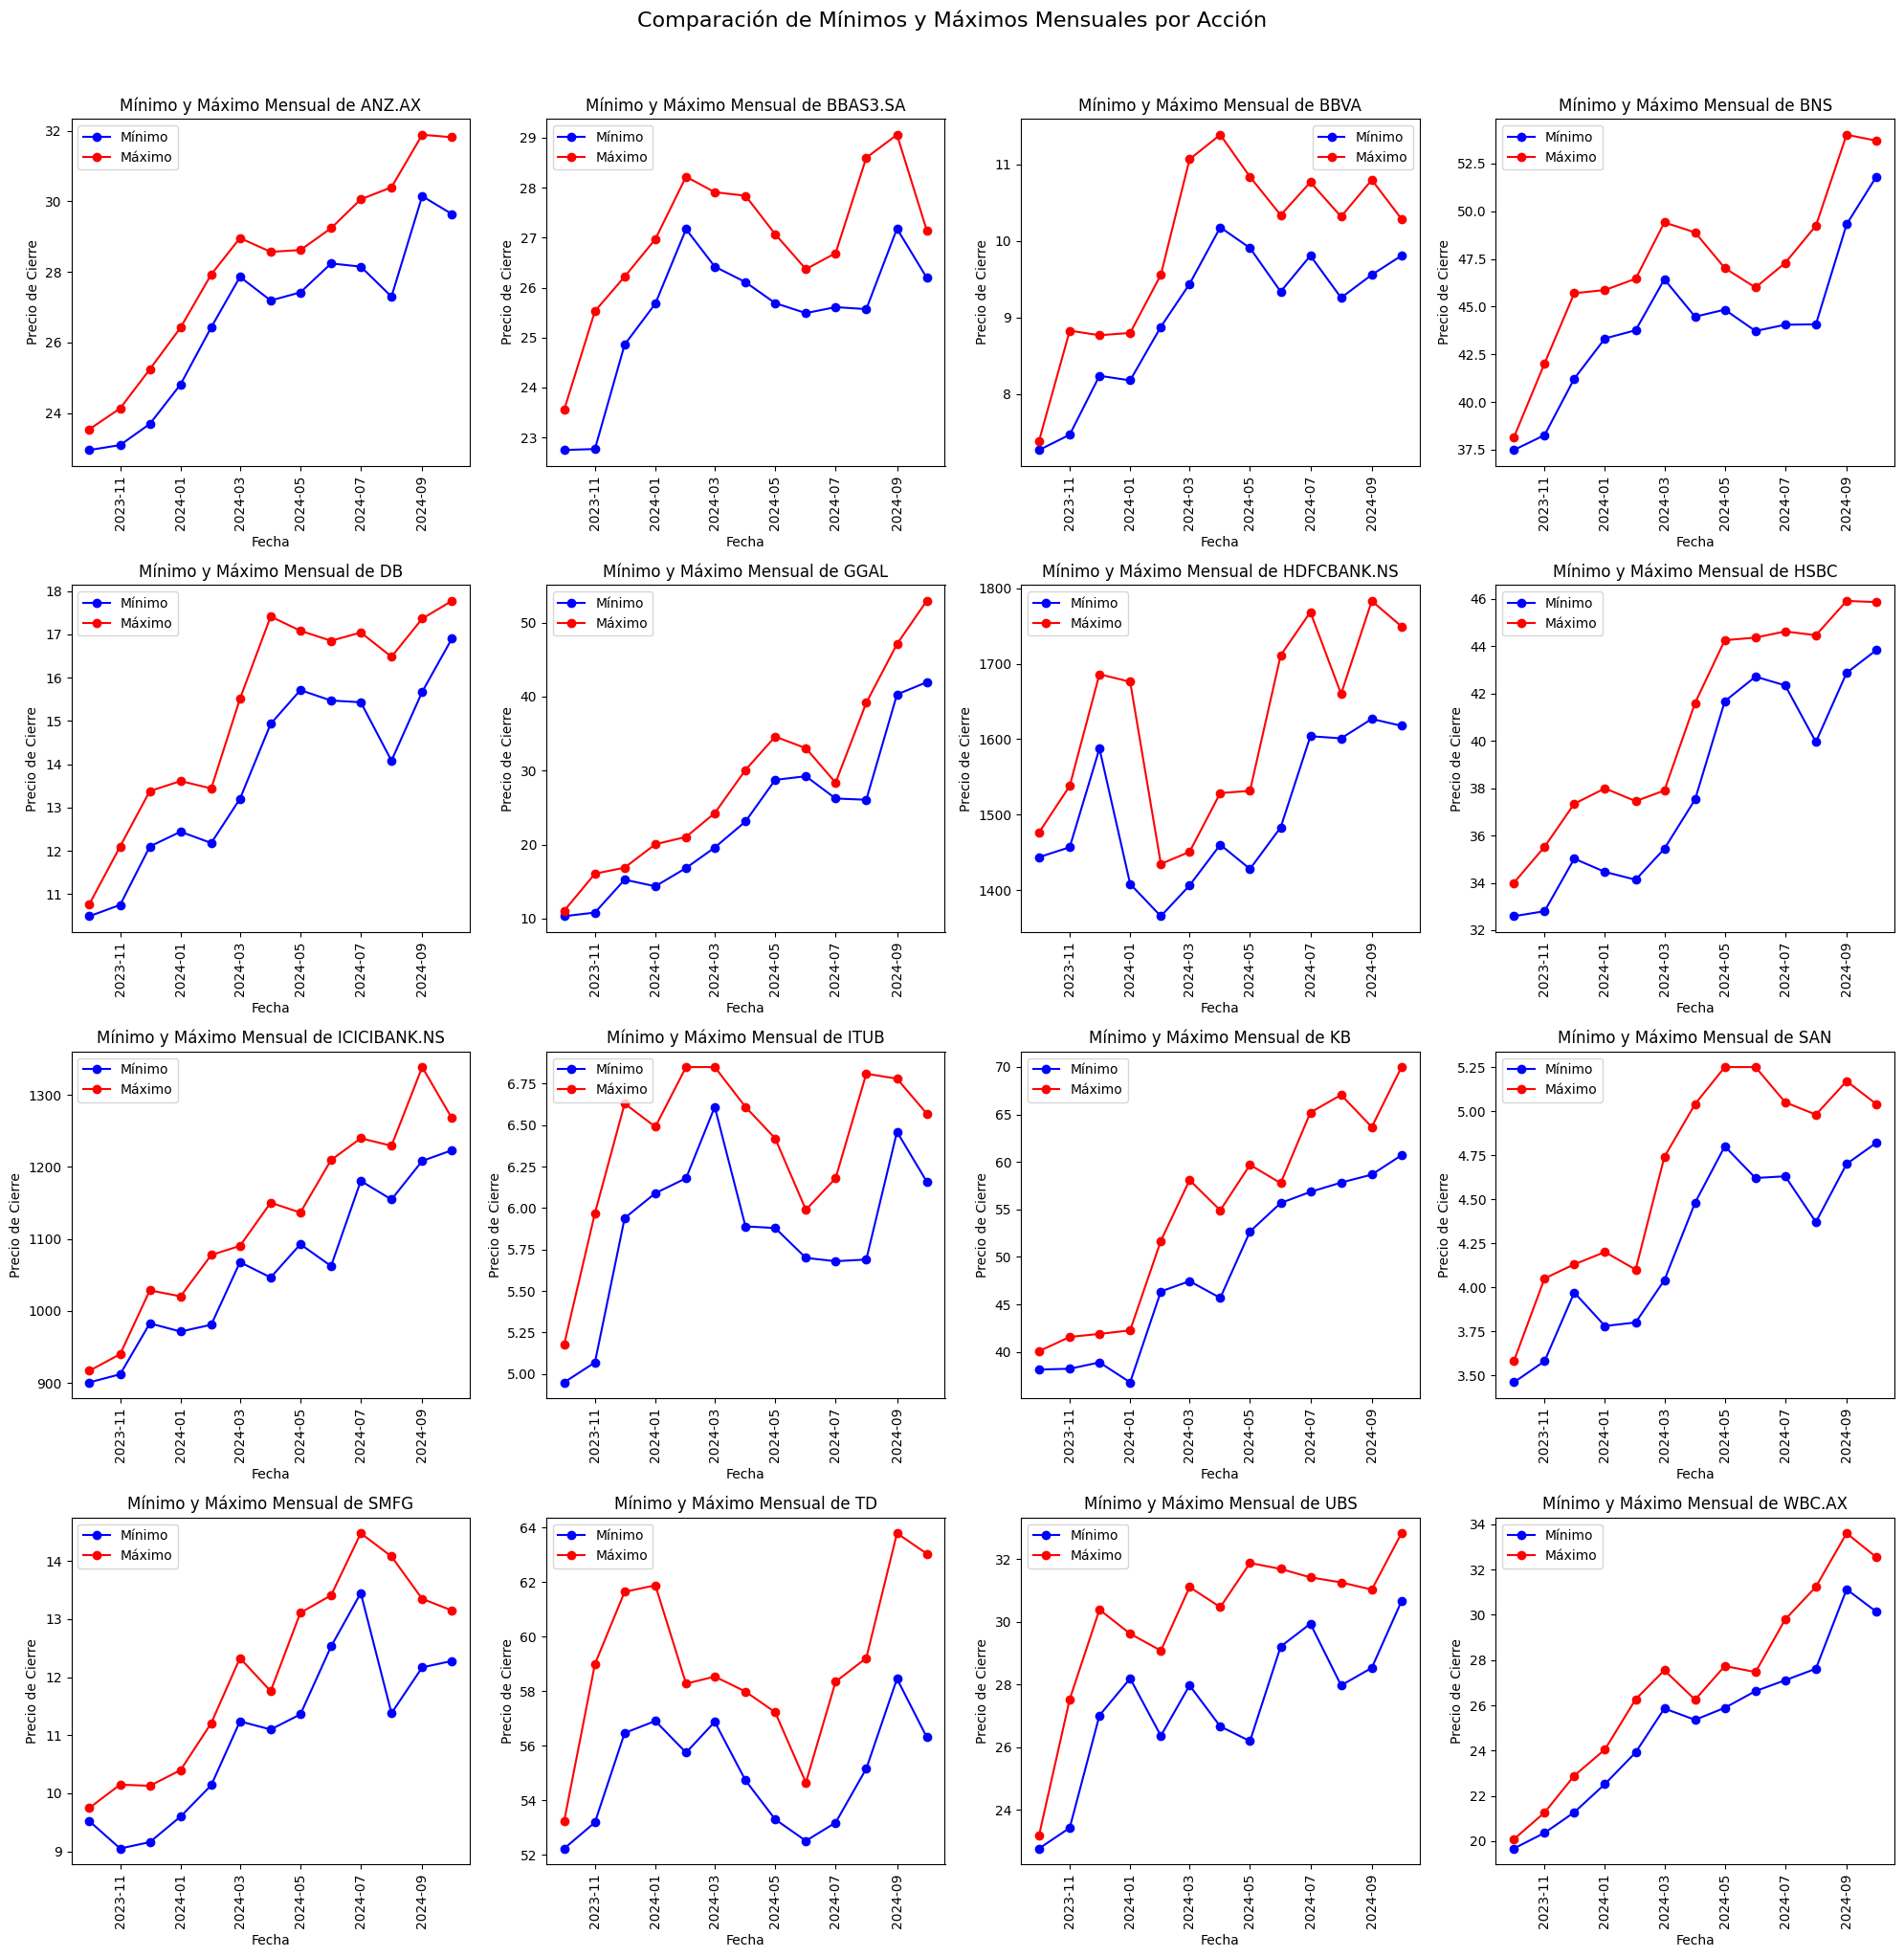

In [41]:
# Asegúrate de corregir o eliminar la línea incompleta antes de continuar
df_comparison = df.copy()

# Convertir la columna 'Date' a datetime y ajustar a UTC
df_comparison['Date'] = pd.to_datetime(df_comparison['Date'], errors='coerce', utc=True)
df_comparison['Date'] = df_comparison['Date'].dt.tz_localize(None)

# Eliminar filas con fechas nulas (por ejemplo, debido a errores de conversión)
df_comparison.dropna(subset=['Date'], inplace=True)

# Agregar columna de año y mes para facilitar el agrupamiento
df_comparison['YearMonth'] = df_comparison['Date'].dt.to_period('M')

# Agrupar por Ticker y YearMonth para calcular el mínimo y máximo mensual
monthly_min_max = df_comparison.groupby(['Ticker', 'YearMonth']).agg({
    'Close': ['min', 'max']
}).reset_index()

# Aplanar las columnas MultiIndex resultantes
monthly_min_max.columns = ['Ticker', 'YearMonth', 'MinClose', 'MaxClose']

# Convertir YearMonth de Period a Timestamp para graficar
monthly_min_max['YearMonth'] = monthly_min_max['YearMonth'].dt.to_timestamp()

# Obtener lista de tickers
tickers = monthly_min_max['Ticker'].unique()
num_tickers = len(tickers)

# Definir número de columnas y filas para los subplots
ncols = 4
nrows = (num_tickers + ncols - 1) // ncols  # Calcula el número de filas necesarias

# Crear subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows), constrained_layout=True)
axs = axs.flatten()

for i, ticker in enumerate(tickers):
    data = monthly_min_max[monthly_min_max['Ticker'] == ticker]
    ax = axs[i]

    # Graficar los mínimos y máximos
    ax.plot(data['YearMonth'], data['MinClose'], label='Mínimo', marker='o', color='b')
    ax.plot(data['YearMonth'], data['MaxClose'], label='Máximo', marker='o', color='r')

    # Formatear fechas en el eje x
    ax.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
    plt.setp(ax.get_xticklabels(), rotation=90)

    ax.set_title(f'Mínimo y Máximo Mensual de {ticker}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio de Cierre')
    ax.legend()

# Eliminar subplots vacíos
for idx in range(num_tickers, nrows * ncols):
    fig.delaxes(axs[idx])

plt.suptitle('Comparación de Mínimos y Máximos Mensuales por Acción', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Al describir la gráfica, es importante destacar cómo la visualización te ayuda a entender el comportamiento histórico de las acciones, identificar tendencias y volatilidades, y relacionar estos hallazgos con posibles factores externos. Esto proporciona un contexto valioso para análisis financieros y toma de decisiones estratégicas.

#### Evolucion de cierre promedio por banco

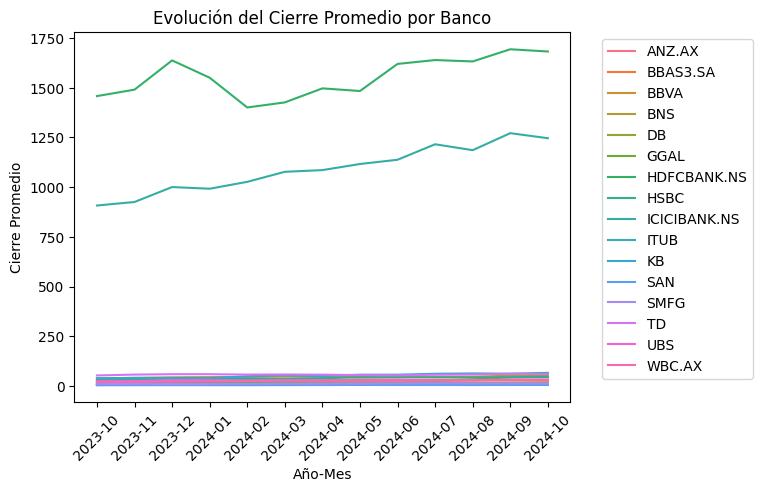

<Figure size 1200x600 with 0 Axes>

In [42]:
df_crecimiento = df.copy()

df_crecimiento['Date'] = pd.to_datetime(df_crecimiento['Date'], errors='coerce', utc=True)
df_crecimiento['Date'] = df_crecimiento['Date'].dt.tz_localize(None)

# Eliminar filas con fechas nulas (por ejemplo, debido a errores de conversión)
df_crecimiento.dropna(subset=['Date'], inplace=True)

# Agregar columna de año y mes para facilitar el agrupamiento
df_crecimiento['YearMonth'] = df_crecimiento['Date'].dt.to_period('M')

#Agrupamos por mes y precio de cierre promedio, agregamos los tickers
mean_close = df_crecimiento.groupby(['YearMonth','Ticker']).agg({'Close': 'mean'}).reset_index()

#Cambiamos el tipo de dato de la columna YearMonth
mean_close['YearMonth'] = mean_close['YearMonth'].dt.strftime('%Y-%m')

# Creamos el gráfico de líneas con ajustes
sns.lineplot(x='YearMonth', y='Close', hue='Ticker', data=mean_close)

# Ajustamos la posición de la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Personalimos los títulos y etiquetas
plt.title('Evolución del Cierre Promedio por Banco')
plt.xlabel('Año-Mes')
plt.ylabel('Cierre Promedio')

# Ajustamos el tamaño de la figura (opcional)
plt.figure(figsize=(12, 6))

plt.show()

In [43]:
# Borramos los 2 bancos de india ya que vamos a tener una mejor visualizacion de la grafica
df_crec_close_filtrado = df_crecimiento[(df_crecimiento['Ticker'] != 'HDFCBANK.NS') & (df_crecimiento['Ticker'] != 'ICICIBANK.NS')]

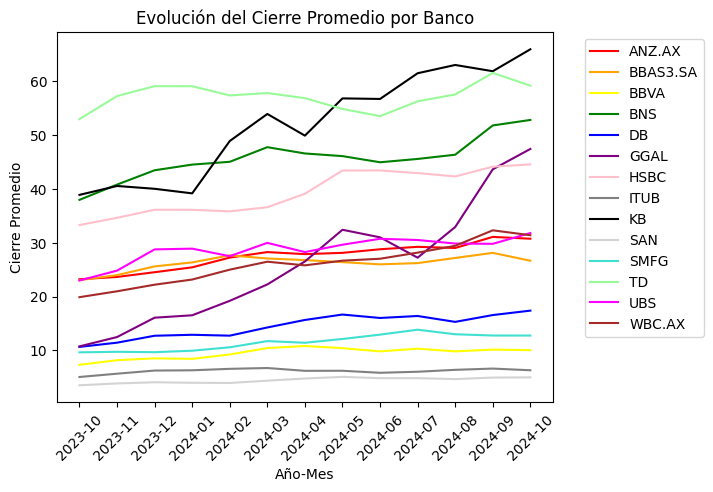

<Figure size 1200x600 with 0 Axes>

Evolucion de precio de Cierre a lo largo de un año: 
Mes: 2023-10 --> Ticker: ANZ.AX---> Close Promedio del mes: 23.21142857142857
Mes: 2023-10 --> Ticker: BBAS3.SA---> Close Promedio del mes: 23.036666666666665
Mes: 2023-10 --> Ticker: BBVA---> Close Promedio del mes: 7.314
Mes: 2023-10 --> Ticker: BNS---> Close Promedio del mes: 37.956
Mes: 2023-10 --> Ticker: DB---> Close Promedio del mes: 10.639999999999999
Mes: 2023-10 --> Ticker: GGAL---> Close Promedio del mes: 10.738
Mes: 2023-10 --> Ticker: HSBC---> Close Promedio del mes: 33.28
Mes: 2023-10 --> Ticker: ITUB---> Close Promedio del mes: 5.052
Mes: 2023-10 --> Ticker: KB---> Close Promedio del mes: 38.882
Mes: 2023-10 --> Ticker: SAN---> Close Promedio del mes: 3.5119999999999996
Mes: 2023-10 --> Ticker: SMFG---> Close Promedio del mes: 9.629999999999999
Mes: 2023-10 --> Ticker: TD---> Close Promedio del mes: 52.958000000000006
Mes: 2023-10 --> Ticker: UBS---> Close Promedio del mes: 22.98
Mes: 2023-10 --> Ticker: WBC.AX---> Clo

In [44]:
#Quitamos de la columna Ticker a HDFCBANCK.NS y ICICIBANK.NS
mean_close_filtrado = mean_close[(mean_close['Ticker'] != 'HDFCBANK.NS') & (mean_close['Ticker'] != 'ICICIBANK.NS')]

#Creamos una paleta de colores para poder distinguir mejor la leyenda
colores = ['#FF0000', '#FFA500', '#FFFF00', '#008000', '#0000FF', '#800080', '#FFC0CB', '#808080', '#000000', '#D3D3D3', '#40E0D0', '#98FB98', '#FF00FF', '#A52A2A']

# Creamos el gráfico de líneas con ajustes
sns.lineplot(x='YearMonth', y='Close', hue='Ticker', data=mean_close_filtrado, palette=colores)

# Ajustamos la posición de la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Personalimos los títulos y etiquetas
plt.title('Evolución del Cierre Promedio por Banco')
plt.xlabel('Año-Mes')
plt.ylabel('Cierre Promedio')

# Ajustamos el tamaño de la figura (opcional)
plt.figure(figsize=(12, 6))

plt.show()

print('Evolucion de precio de Cierre a lo largo de un año: ')
for index, row in mean_close_filtrado.iterrows():
    ticker = row['Ticker']
    yearmonth = row['YearMonth']
    close = row['Close']
    print(f'Mes: {yearmonth} --> Ticker: {ticker}---> Close Promedio del mes: {close}')

In [ ]:
ticker_unique = list(df_crec_close_filtrado['Ticker'].unique())
lista_df_ticker = []
for i in ticker_unique:
    df_filt_ticker = df_crec_close_filtrado[df_crec_close_filtrado['Ticker'] == i]
    # Creamos el boxplot
    sns.boxplot(x='YearMonth', y='Close', data=df_filt_ticker,palette='deep')
    # Rotamos las etiquetas del eje x para mejor visualización
    plt.xticks(rotation=45)
    # Personalizamos los títulos y etiquetas
    plt.title(f'Dispersión de Cierre Mensual del Banco {i}')
    plt.xlabel('Mes')
    plt.ylabel('Cierre Diario')
    plt.show()

In [ ]:
# Creamos el gráfico de boxplot con ajustes
sns.boxplot(x='Ticker', y='Close', data=mean_close_filtrado, palette=colores)

# Rotamos las etiquetas del eje x
plt.xticks(rotation=45)

# Personalizamos los títulos y etiquetas
plt.title('Distribución del Cierre Promedio por Banco')
plt.xlabel('Banco')
plt.ylabel('Cierre Promedio')

# Ajustamos el tamaño de la figura (opcional)
plt.figure(figsize=(12, 6))

plt.show()

In [ ]:
def plot_cumulative_percentage_increase(df):
    # Crear una copia del DataFrame para evitar el SettingWithCopyWarning
    df = df.copy()

    # Convertir la columna 'Date' a formato datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Convertir 'Close' a numérico y manejar errores
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df = df.dropna(subset=['Close'])

    # Crear la columna 'YearMonth' como Periodo
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Obtener la lista única de tickers
    tickers = df['Ticker'].unique()

    # Crear un DataFrame vacío para almacenar los resultados
    cumulative_increase_df = pd.DataFrame()

    # Iterar sobre cada banco (Ticker)
    for ticker in tickers:
        # Filtrar los datos para el banco actual
        df_ticker = df[df['Ticker'] == ticker]

        # Calcular la media mensual del cierre
        monthly_mean = df_ticker.groupby('YearMonth')['Close'].mean().reset_index()

        # Ordenar por fecha
        monthly_mean = monthly_mean.sort_values('YearMonth').reset_index(drop=True)

        # Calcular el porcentaje de incremento acumulado
        monthly_mean['Percentage Increase'] = monthly_mean['Close'].pct_change().fillna(0)
        monthly_mean['Cumulative Increase'] = (1 + monthly_mean['Percentage Increase']).cumprod() - 1

        # Agregar el ticker al DataFrame
        monthly_mean['Ticker'] = ticker

        # Concatenar los resultados
        cumulative_increase_df = pd.concat([cumulative_increase_df, monthly_mean], ignore_index=True)

    # Convertir 'YearMonth' a datetime para que Seaborn pueda interpretarlo
    cumulative_increase_df['YearMonth'] = cumulative_increase_df['YearMonth'].dt.to_timestamp()

    # Configurar el gráfico
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=cumulative_increase_df, x='YearMonth', y='Cumulative Increase', hue='Ticker', marker='o',palette=colores)

    # Formato del eje x
    plt.xticks(rotation=45)
    plt.xlabel('Mes')
    plt.ylabel('Incremento Acumulado (%)')
    plt.title('Incremento Acumulado de la Media del Cierre Mensual por Banco')

    # Formato del eje y en porcentaje
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    plt.legend(title='Banco')
    plt.tight_layout()
    plt.show()

# Llamar a la función con tu DataFrame
plot_cumulative_percentage_increase(df_crec_close_filtrado)

Podemos ver como la mayoria de los bancos tiene un incremento anual de menos de un 50% mientras que el banco galicia fue de mas de 300%

#### Volatilidad

In [ ]:
# Calculamos los retornos diarios para cada 'Ticker'
df_crec_close_filtrado['Return'] = df_crec_close_filtrado.groupby('Ticker')['Close'].pct_change()

# Calculamos la volatilidad diaria para cada banco
volatilidad_por_banco = df_crec_close_filtrado.groupby('Ticker')['Return'].std().reset_index()
volatilidad_por_banco.rename(columns={'Return': 'Volatilidad'}, inplace=True)

# Crear el gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x='Ticker', y='Volatilidad', data=volatilidad_por_banco, palette=colores)

# Personalizar el gráfico
plt.title('Volatilidad Diaria por Banco')
plt.xlabel('Banco')
plt.ylabel('Volatilidad (Desviación Estándar de Retornos Diarios)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Agregamos la columna 'Country' al DataFrame de volatilidad
volatilidad_por_banco = volatilidad_por_banco.merge(df[['Ticker', 'Country']].drop_duplicates(), on='Ticker', how='left')

# Calculamos la volatilidad promedio por país
volatilidad_por_pais = volatilidad_por_banco.groupby('Country')['Volatilidad'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Volatilidad', data=volatilidad_por_pais, palette='pastel')

# Personalizar el gráfico
plt.title('Volatilidad Promedio por País')
plt.xlabel('País')
plt.ylabel('Volatilidad Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crear el gráfico de barras segmentado por país
plt.figure(figsize=(12,6))
sns.barplot(x='Ticker', y='Volatilidad', hue='Country', data=volatilidad_por_banco)

# Personalizar el gráfico
plt.title('Volatilidad Diaria por Banco y País')
plt.xlabel('Banco')
plt.ylabel('Volatilidad (Desviación Estándar de Retornos Diarios)')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.tight_layout()
plt.show()

# Ideas

1. crecimiento de la accion en un año porcentualmente y compararla con los otros paises

2. Comparación de Crecimiento o Decrecimiento por País GEOGRAFICA
Calcula el crecimiento porcentual total de cada acción durante el período analizado.
Puedes usar gráficos de barras para visualizar el crecimiento o decrecimiento porcentual por país, lo que puede reflejar el rendimiento relativo de los bancos en diferentes regiones.


3. Volumen de Operaciones
Compara el volumen promedio de operaciones para cada banco y país.
Esto te dará una idea de cuán líquidos son los mercados de cada país y cuánta atención están recibiendo las acciones de estos bancos.



4. Análisis de Volatilidad
Calcula la volatilidad diaria del precio de las acciones para cada banco (por ejemplo, usando la desviación estándar de las variaciones diarias del precio de cierre).
Puedes visualizar esta información en gráficos de barras, donde cada barra represente la volatilidad de un banco específico, segmentado por país.
combinar 5 y 6
5. Comparación de Volatilidad por País(varianza)
Analiza si hay diferencias significativas en la volatilidad de los precios de las acciones entre países. Puedes calcular la volatilidad promedio por país y representarla en un gráfico de barras.